# Business Problem
We are a telecommunications company operating in California in USA. We are interested in determining customers at risk of churning and the primary reasons for why they churn, to maximize our customer retention and boost our revenue. To accomplish this we want to build a classification model that can determine the likelihood of a customer churning.

# Data Collection
We acquire customer data spanning 6 years with an indication of whether or not the customer has churned at the end of this period. 

In [69]:
# Installing packages
!pip install opendatasets -q

In [70]:
import opendatasets as od

# Downloading kaggle dataset
od.download("https://www.kaggle.com/datasets/yeanzc/telco-customer-churn-ibm-dataset")

Skipping, found downloaded files in ".\telco-customer-churn-ibm-dataset" (use force=True to force download)


In [71]:
import pandas as pd

# Converting the .csv file to a pandas dataframe
churn_df = pd.read_excel("telco-customer-churn-ibm-dataset/Telco_customer_churn.xlsx")

# Showing first 5 rows and all columns of the dataframe
pd.set_option("display.max_columns", None)
churn_df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [72]:
# Checking the number of rows and columns in the dataframe
churn_df.shape

(7043, 33)

## Definition of attributes
- **CustomerID**: A unique ID that identifies each customer.  
- **Count**: A value used in reporting/dashboarding to sum up the number of customers in a filtered set.  
- **Country**: The country of the customer’s primary residence.  
- **State**: The state of the customer’s primary residence.  
- **City**: The city of the customer’s primary residence.  
- **Zip Code**: The zip code of the customer’s primary residence.  
- **Lat Long**: The combined latitude and longitude of the customer’s primary residence.  
- **Latitude**: The latitude of the customer’s primary residence.  
- **Longitude**: The longitude of the customer’s primary residence.  
- **Gender**: The customer’s gender: Male, Female.  
- **Senior Citizen**: Indicates if the customer is 65 or older: Yes, No.  
- **Partner**: Indicates if the customer has a partner: Yes, No.  
- **Dependents**: Indicates if the customer lives with any dependents: Yes, No.  
- **Tenure Months**: Indicates the total amount of months that the customer has been with the company by the end of the third quarter.
- **Phone Service**: Indicates if the customer subscribes to home phone service with the company: Yes, No.  
- **Multiple Lines**: Indicates if the customer subscribes to multiple telephone lines with the company: Yes, No.  
- **Internet Service**: Indicates if the customer subscribes to Internet service with the company: No, DSL, Fiber Optic, Cable.  
- **Online Security**: Indicates if the customer subscribes to an additional online security service provided by the company: Yes, No.  
- **Online Backup**: Indicates if the customer subscribes to an additional online backup service provided by the company: Yes, No.  
- **Device Protection**: Indicates if the customer subscribes to an additional device protection plan for their Internet equipment provided by the company: Yes, No.  
- **Tech Support**: Indicates if the customer subscribes to an additional technical support plan from the company with reduced wait times: Yes, No.  
- **Streaming TV**: Indicates if the customer uses their Internet service to stream television programming from a third-party provider: Yes, No.  
- **Streaming Movies**: Indicates if the customer uses their Internet service to stream movies from a third-party provider: Yes, No.  
- **Contract**: Indicates the customer’s current contract type: Month-to-Month, One Year, Two Year.  
- **Paperless Billing**: Indicates if the customer has chosen paperless billing: Yes, No.  
- **Payment Method**: Indicates how the customer pays their bill: Bank Withdrawal, Credit Card, Mailed Check.  
- **Monthly Charge**: Indicates the customer’s current total monthly charge for all their services from the company.  
- **Total Charges**: Indicates the customer’s total charges, calculated to the end of the third quarter.  
- **Churn Label**: Yes = the customer left the company this quarter. No = the customer remained with the company.  
- **Churn Value**: 1 = the customer left the company this quarter. 0 = the customer remained with the company.  
- **Churn Score**: A value from 0-100 that is calculated using the predictive tool IBM SPSS Modeler. The model incorporates multiple factors known to cause churn. The higher the score, the more likely the customer will churn.  
- **CLTV**: Customer Lifetime Value. A predicted CLTV is calculated using corporate formulas and existing data. The higher the value, the more valuable the customer. High-value customers should be monitored for churn.  
- **Churn Reason**: A customer’s specific reason for leaving the company.

## Data Collection Overview
**Process**
- Acquired 7043 rows of Californian telecom customer churn data from kaggle.

**Findings**
- We notice that some features only has a single unique value, making it redundant for analysis and pattern recognition. 

# Data Understanding: Exploratory Data Analysis (EDA)
We explore the distributions of attributes and the relationships between features and churning and ensure all attributes are in the right format.  

In [76]:
# Checking for null values and data types of attributes
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [77]:
# Ensuring that pandas does not apply silent downcasting of datatypes
pd.set_option("future.no_silent_downcasting", True)

# Replacing whitespace with 0 and converting data type to float of the total charges feature
churn_df["Total Charges"] = churn_df["Total Charges"].replace(" ", 0).astype(float)

# Checking that the data type has been updated
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [78]:
# Investigating the statistical distribution of attributes
churn_df.describe()

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Total Charges,Churn Value,Churn Score,CLTV
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,93521.964646,36.282441,-119.798880,32.371149,64.761692,2279.734304,0.265370,58.699418,4400.295755
std,0.0,1865.794555,2.455723,2.157889,24.559481,30.090047,2266.794470,0.441561,21.525131,1183.057152
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.250000,0.000000,0.000000,5.000000,2003.000000
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,35.500000,398.550000,0.000000,40.000000,3469.000000
50%,1.0,93552.000000,36.391777,-119.730885,29.000000,70.350000,1394.550000,0.000000,61.000000,4527.000000
75%,1.0,95351.000000,38.224869,-118.043237,55.000000,89.850000,3786.600000,1.000000,75.000000,5380.500000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.750000,8684.800000,1.000000,100.000000,6500.000000


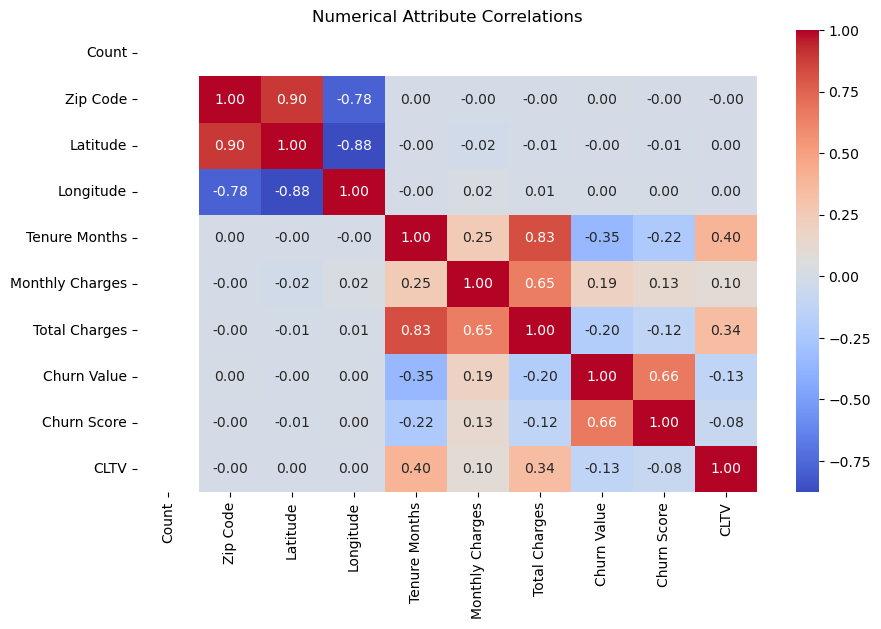

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

# Creating a heatmap of numerical attribute correlations
numerical_df = churn_df.select_dtypes(include="number")

plt.figure(figsize=(10, 6))
sns.heatmap(numerical_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Numerical Attribute Correlations")
plt.show()

In [80]:
# Checking cardinality of attributes
churn_df.nunique()

CustomerID           7043
Count                   1
Country                 1
State                   1
City                 1129
Zip Code             1652
Lat Long             1652
Latitude             1652
Longitude            1651
Gender                  2
Senior Citizen          2
Partner                 2
Dependents              2
Tenure Months          73
Phone Service           2
Multiple Lines          3
Internet Service        3
Online Security         3
Online Backup           3
Device Protection       3
Tech Support            3
Streaming TV            3
Streaming Movies        3
Contract                3
Paperless Billing       2
Payment Method          4
Monthly Charges      1585
Total Charges        6531
Churn Label             2
Churn Value             2
Churn Score            85
CLTV                 3438
Churn Reason           20
dtype: int64

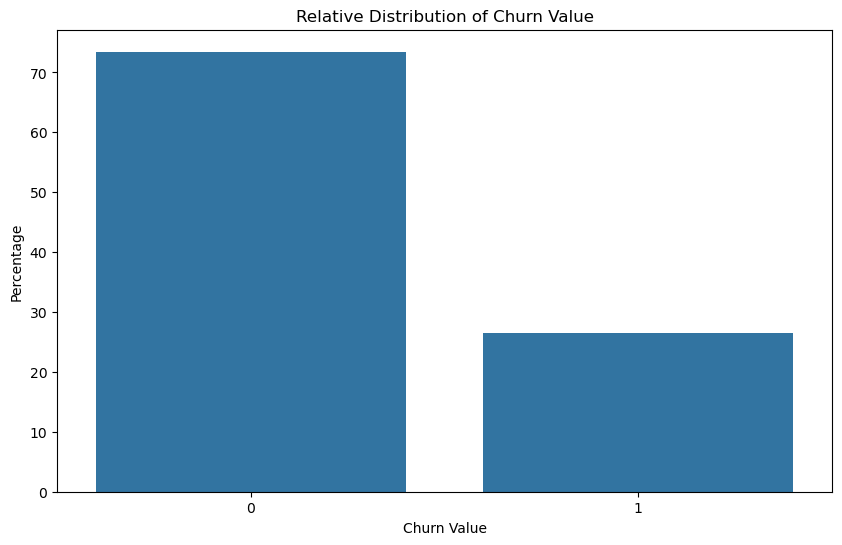

In [81]:
# Creating a countplot of the relative distribution of churn values
plt.figure(figsize=(10, 6))
sns.countplot(data=churn_df, x="Churn Value", stat="percent")

plt.title("Relative Distribution of Churn Value")
plt.xlabel("Churn Value")
plt.ylabel("Percentage")
plt.show()

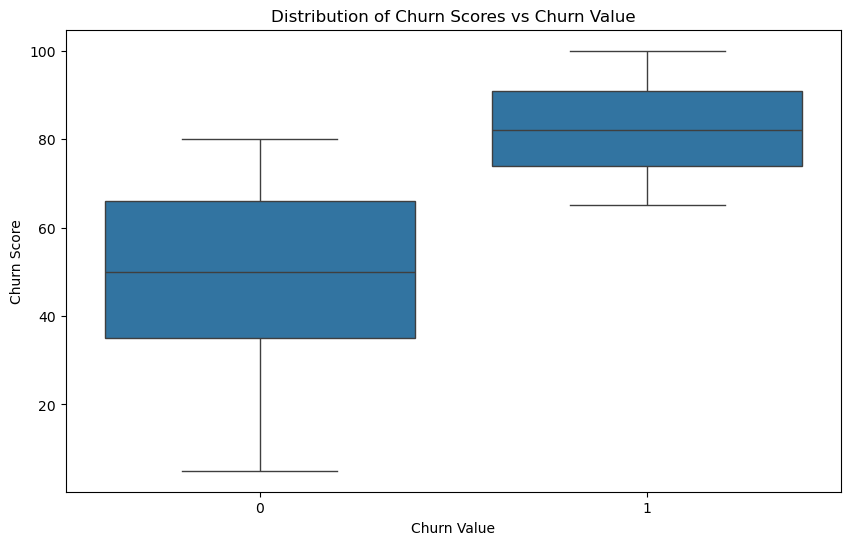

In [82]:
# Creating a boxplot of the distribution of churn score by churn value
plt.figure(figsize=(10, 6))
sns.boxplot(data=churn_df, x="Churn Value", y="Churn Score")

plt.title("Distribution of Churn Scores vs Churn Value")
plt.xlabel("Churn Value")
plt.ylabel("Churn Score")
plt.show()

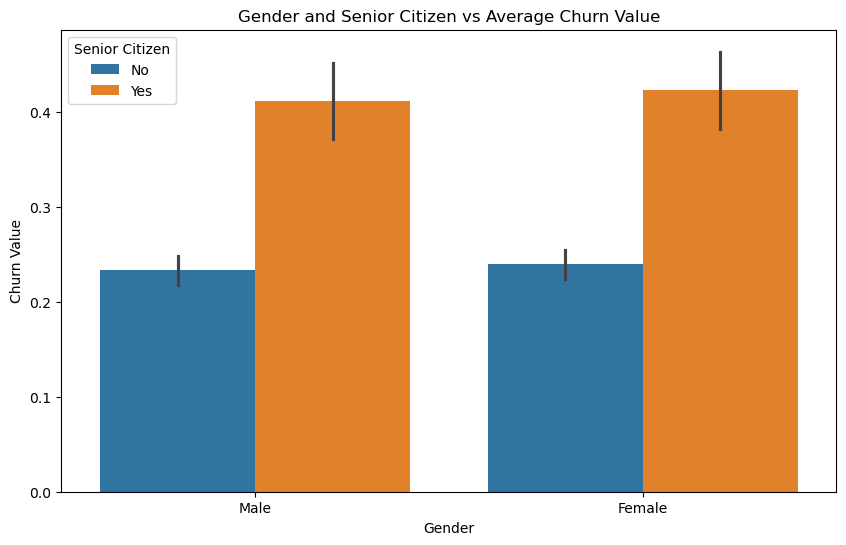

In [83]:
# Creating a barplot of gender and senior citizen vs average churn value
plt.figure(figsize=(10, 6))
sns.barplot(data=churn_df, x="Gender", y="Churn Value", hue="Senior Citizen")

plt.title("Gender and Senior Citizen vs Average Churn Value")
plt.xlabel("Gender")
plt.ylabel("Churn Value")
plt.show()

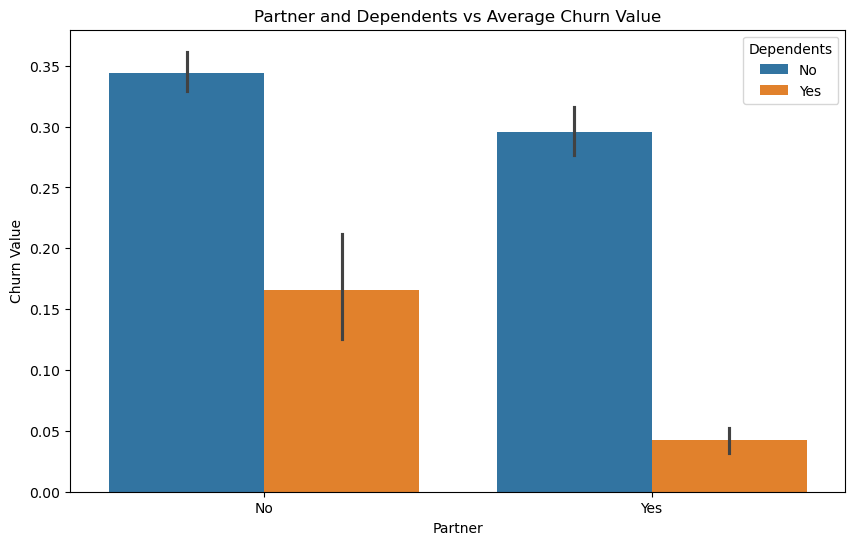

In [84]:
# Creating a barplot of partner and dependents vs average churn value
plt.figure(figsize=(10, 6))
sns.barplot(data=churn_df, x="Partner", y="Churn Value", hue="Dependents")

plt.title("Partner and Dependents vs Average Churn Value")
plt.xlabel("Partner")
plt.ylabel("Churn Value")
plt.show()

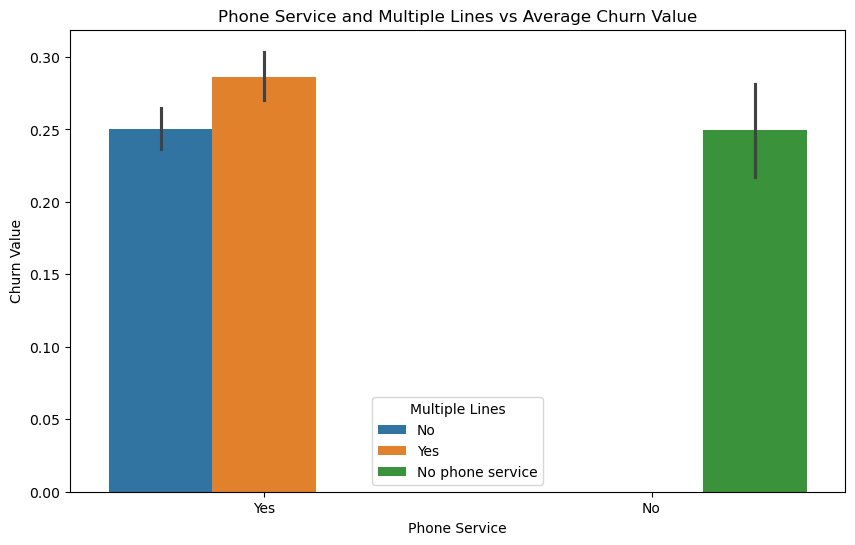

In [85]:
# Creating a barplot of phone service and multiple lines vs average churn value
plt.figure(figsize=(10, 6))
sns.barplot(data=churn_df, x="Phone Service", y="Churn Value", hue="Multiple Lines")

plt.title("Phone Service and Multiple Lines vs Average Churn Value")
plt.xlabel("Phone Service")
plt.ylabel("Churn Value")
plt.show()

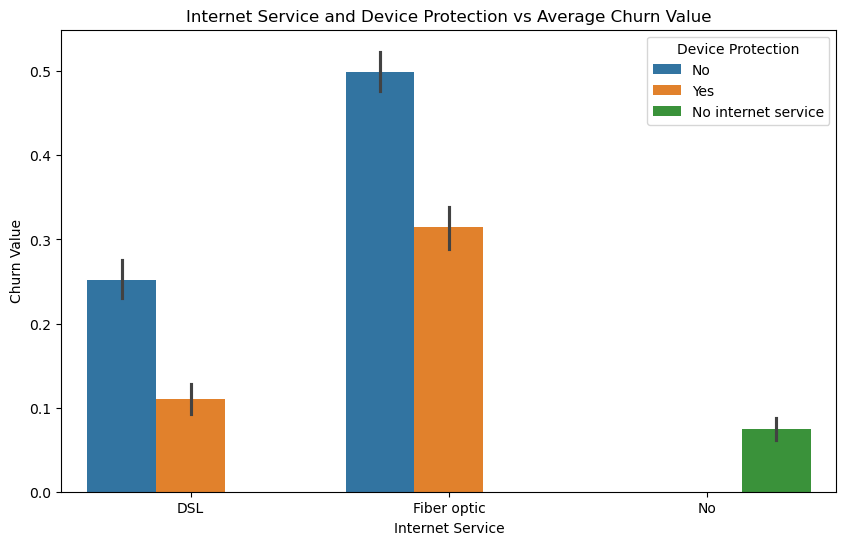

In [86]:
# Creating a barplot of internet service and device protection vs average churn value
plt.figure(figsize=(10, 6))
sns.barplot(data=churn_df, x="Internet Service", y="Churn Value", hue="Device Protection")

plt.title("Internet Service and Device Protection vs Average Churn Value")
plt.xlabel("Internet Service")
plt.ylabel("Churn Value")
plt.show()

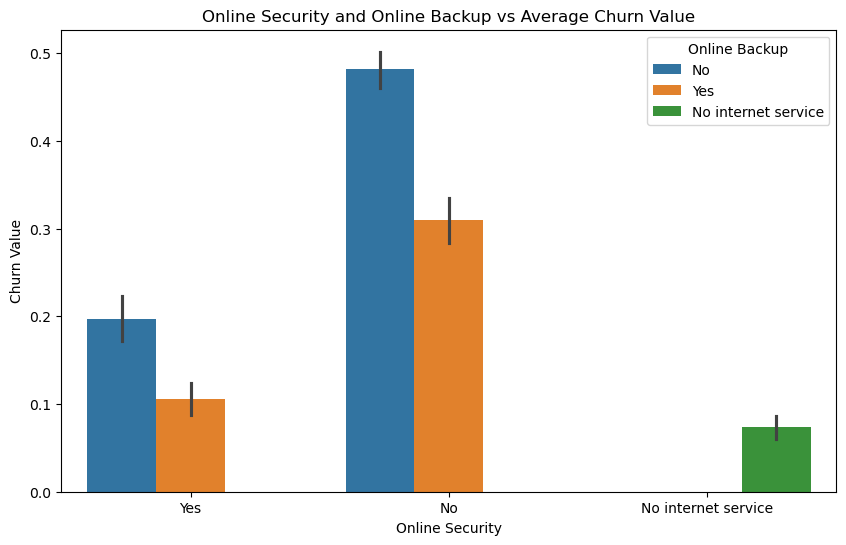

In [87]:
# Creating a barplot of online security and online backup vs average churn value
plt.figure(figsize=(10, 6))
sns.barplot(data=churn_df, x="Online Security", y="Churn Value", hue="Online Backup", hue_order=["No", "Yes", "No internet service"])

plt.title("Online Security and Online Backup vs Average Churn Value")
plt.xlabel("Online Security")
plt.ylabel("Churn Value")
plt.show()

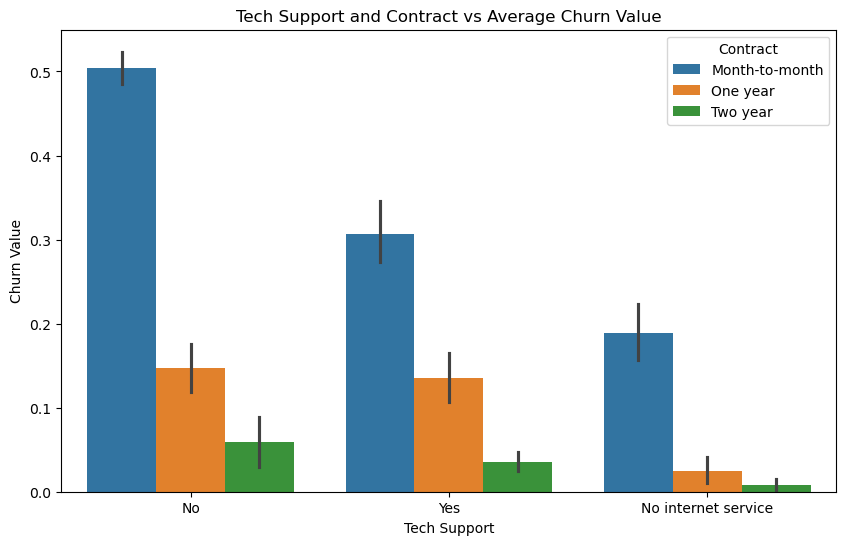

In [88]:
# Creating a barplot of tech support and contract vs average churn value
plt.figure(figsize=(10, 6))
sns.barplot(data=churn_df, x="Tech Support", y="Churn Value", hue="Contract", hue_order=["Month-to-month", "One year", "Two year"])

plt.title("Tech Support and Contract vs Average Churn Value")
plt.xlabel("Tech Support")
plt.ylabel("Churn Value")
plt.show()

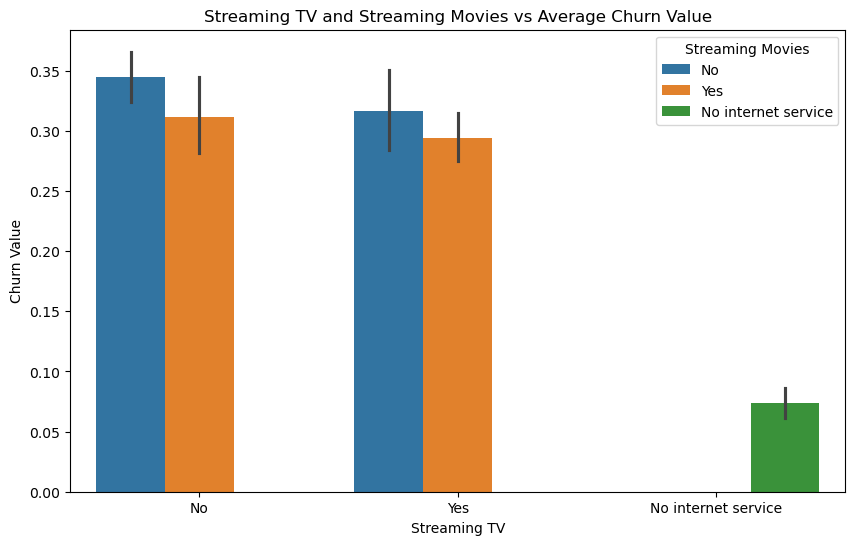

In [89]:
# Creating a barplot of streaming tv and streaming movies vs average churn value
plt.figure(figsize=(10, 6))
sns.barplot(data=churn_df, x="Streaming TV", y="Churn Value", hue="Streaming Movies")

plt.title("Streaming TV and Streaming Movies vs Average Churn Value")
plt.xlabel("Streaming TV")
plt.ylabel("Churn Value")
plt.show()

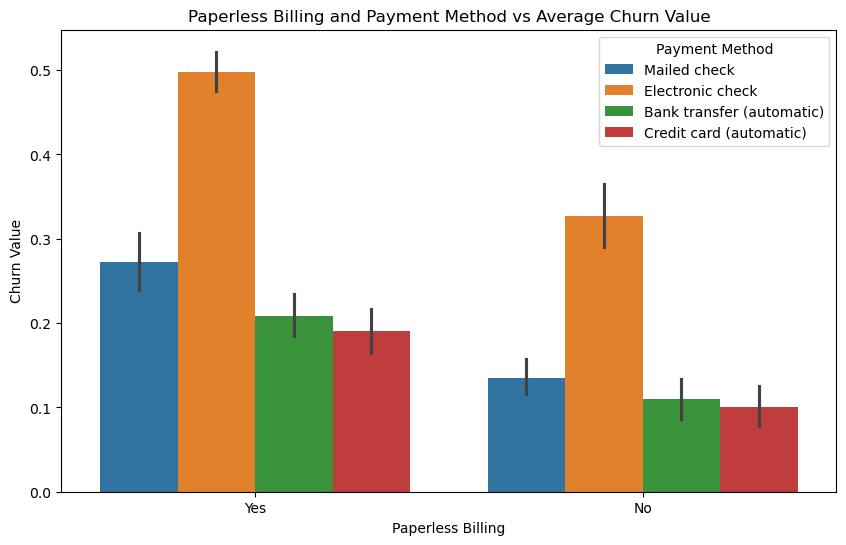

In [90]:
# Creating a barplot of paperless billing and payment method vs average churn value
plt.figure(figsize=(10, 6))
sns.barplot(data=churn_df, x="Paperless Billing", y="Churn Value", hue="Payment Method")

plt.title("Paperless Billing and Payment Method vs Average Churn Value")
plt.xlabel("Paperless Billing")
plt.ylabel("Churn Value")
plt.show()

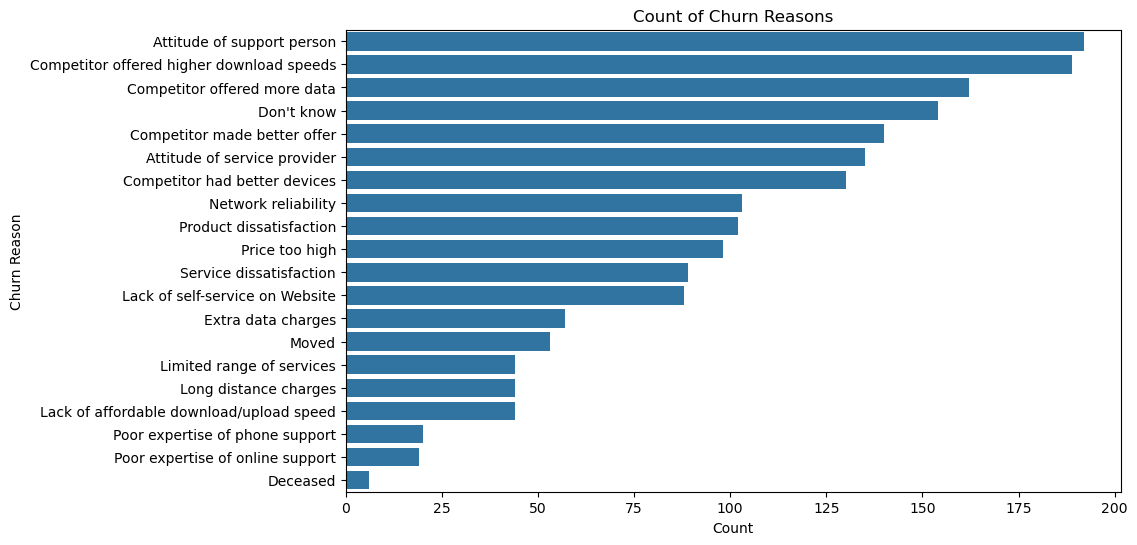

In [91]:
# Creating a horizontal barplot of churn reasons by count
plt.figure(figsize=(10, 6))

churn_reasons_sorted = churn_df["Churn Reason"].value_counts().sort_values(ascending=False).reset_index()

sns.barplot(data=churn_reasons_sorted, y="Churn Reason", x="count")

plt.title("Count of Churn Reasons")
plt.xlabel("Count")
plt.ylabel("Churn Reason")
plt.show()

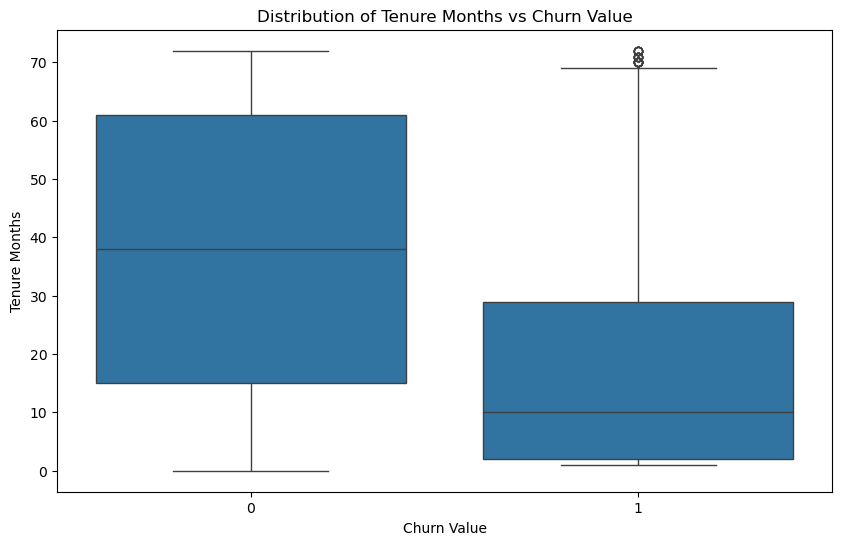

In [92]:
# Creating a boxplot of the distribution of tenure months by churn value
plt.figure(figsize=(10, 6))
sns.boxplot(data=churn_df, x="Churn Value", y="Tenure Months")

plt.title("Distribution of Tenure Months vs Churn Value")
plt.xlabel("Churn Value")
plt.ylabel("Tenure Months")
plt.show()

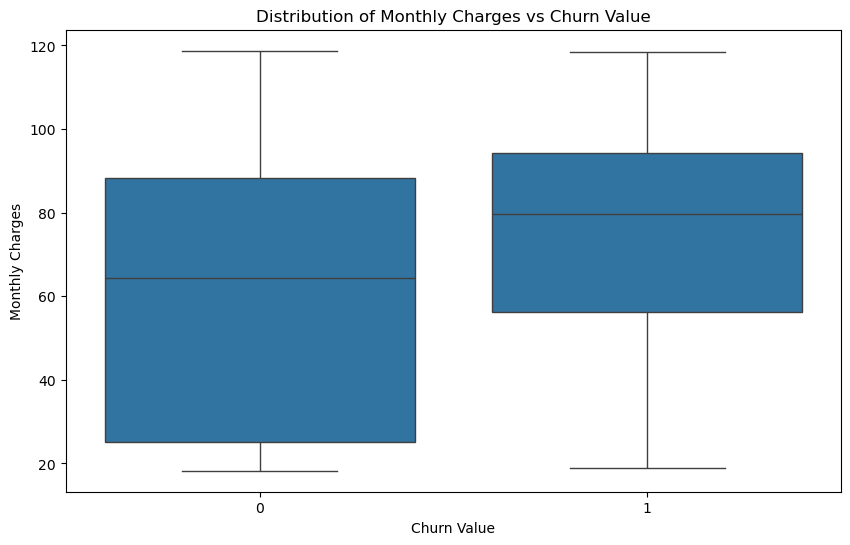

In [93]:
# Creating a boxplot of the distribution of monthly charges by churn value
plt.figure(figsize=(10, 6))
sns.boxplot(data=churn_df, x="Churn Value", y="Monthly Charges")

plt.title("Distribution of Monthly Charges vs Churn Value")
plt.xlabel("Churn Value")
plt.ylabel("Monthly Charges")
plt.show()

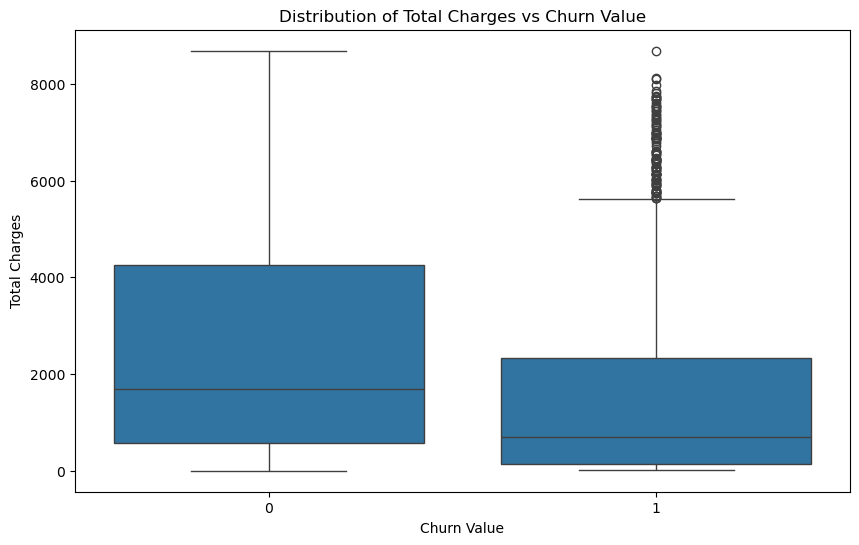

In [94]:
# Creating a boxplot of the distribution of total charges by churn value
plt.figure(figsize=(10, 6))
sns.boxplot(data=churn_df, x="Churn Value", y="Total Charges")

plt.title("Distribution of Total Charges vs Churn Value")
plt.xlabel("Churn Value")
plt.ylabel("Total Charges")
plt.show()

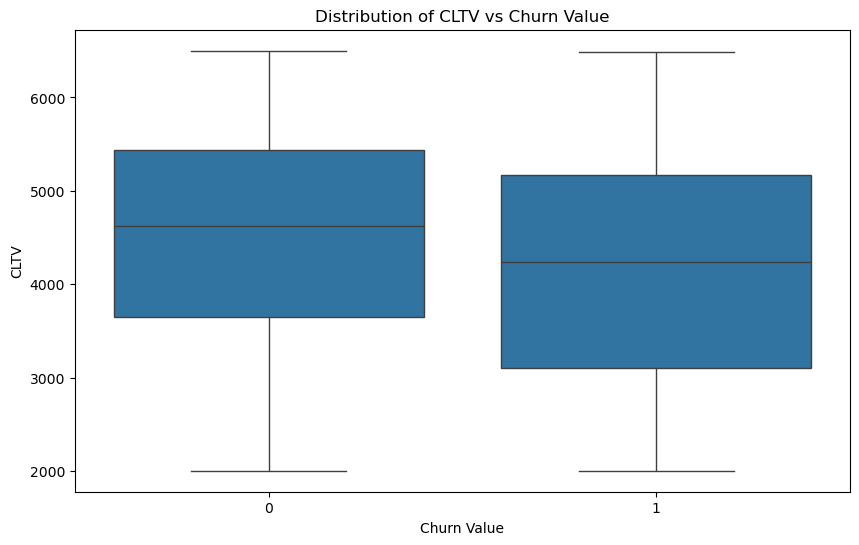

In [95]:
# Creating a boxplot of the distribution of CLTV by churn value
plt.figure(figsize=(10, 6))
sns.boxplot(data=churn_df, x="Churn Value", y="CLTV")

plt.title("Distribution of CLTV vs Churn Value")
plt.xlabel("Churn Value")
plt.ylabel("CLTV")
plt.show()

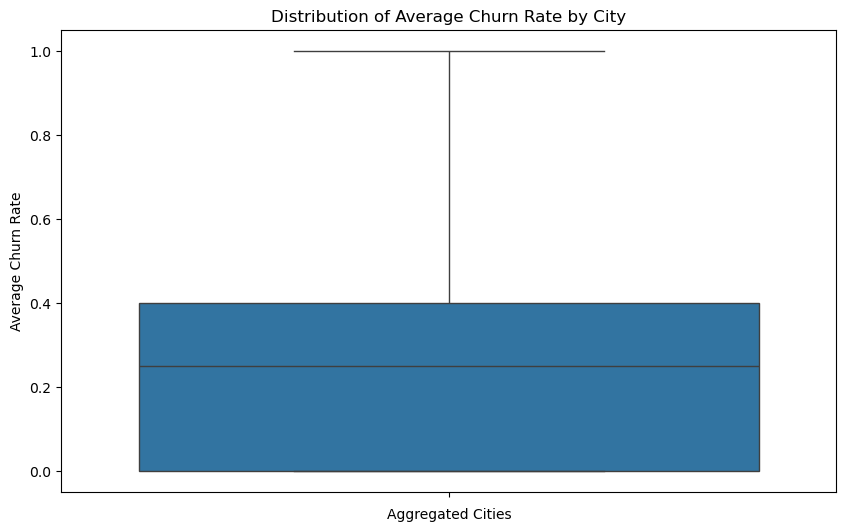

In [96]:
# Getting the average churn rate by city
city_churn_count = churn_df.groupby("City")["Churn Value"].mean().reset_index(name="churn_rate")

# Creating a boxplot of the distribution of average churn rate by city
plt.figure(figsize=(10, 6))
sns.boxplot(data=city_churn_count, y="churn_rate")

plt.title("Distribution of Average Churn Rate by City")
plt.xlabel("Aggregated Cities")
plt.ylabel("Average Churn Rate")
plt.show()

## Data Understanding Overview
**Process**
- Checked for null values and incorrect data types. 
- Changed all white space of the feature "Total Charges" to zeros and changed its datatype to a float.
- Investigated the statistical distribution of attributes. 
-  Made a heatmap of the correlations between all numerical attributes. 
- Checked the cardinality of attributes. 
- Made a countplot of the relative distribution of churn value. 
- Made a boxplot of the distribution of churn scores vs churn value.
- Made bar plots for low cardinality categorical features vs churn value. 
- Made box plots for high cardinality numerical features vs churn value. 
- Made a box plot for the high cardinality categorical feature "City" vs churn value, by grouping city and churn value by size.

**Findings**
 - The feature "Total Charges" had an incorrect data type of "object". 
- 26.5% of customers have churned. 
- Average customer tenure is 32 months. 
- There is a high correlation between total charges and tenure months, as well as between zipcode, latitude and longitude. 
- Churn scores above 80 always led to churn, while scores less than 80 did not. 
- Male and female churn rates are similar.
- The churn rate of senior citizens is significantly higher compared to non-seniors.
    - Senior: Churn rate about 40%.
    - Non-senior: Churn rate about 25%.
- Having a partner or dependents reduces churn significantly.
    - Partner and dependents: Churn rate is less than 5%.
    - Neither partner nor dependents: Churn rate is about 35%. 
- Having multiple phone lines increases the likelihood of churning by a few percent. 
- Higher internet speed increases churn. 
- Having device protection reduces the likelihood of churn.
- Having online security and online backup reduces churn.
    - Both online security and online backup: Churn rate of about 10%.
    - Neither online security nor online backup: Churn rate of almost 50%. 
- Longer contracts lead to lower churn.
- Tech support greatly reduces churn for the month-to-month contract.
    - Month-to-month contract without tech support: About 50% churn rate.
    - Month-to-month contract with tech support: About 30% churn rate.
- Streaming both tv and movies reduce the likelihood of churning by 5 percent points compared to doing neither.
- The payment method of electronic check has the highest churn rate and paperless billing increases the likelihood of churning.
    - Lowest churn: Automatic credit card and no paperless billing at about a 10% churn rate.
    - Highest churn: Electronic check and paperless billing at about a 50% churn rate. 
- The attitude of the support person, competitor offering higher download speed and competitor offering more data are the most common reasons for churning.
- Customers with higher monthly charges are more likely to churn.
- Conversely, customers with lower total charges are more likely to churn. 
- Higher CLTV scores give a slight reduction in churn likelihood. 
- 75% of cities have a lower churn rate at less than 40%, while 25% of cities has a very high churn rate of more than 40%. Given that we know that the average churn rate is 26.5%, this must mean that the majority of cities with higher churn rates, must have fewer customers than the ones with lower churn rates. 

# Data Preprocessing
We perform data cleaning to prepare for machine learning.
We check the data for duplicates as well as missing and invalid values and drop unnecessary features.

In [99]:
# Checking for duplicates
churn_df.duplicated().sum()

0

In [100]:
# Checking for null values
churn_df.isnull().sum()

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

In [101]:
# Checking cardinality of features
churn_df.nunique()

CustomerID           7043
Count                   1
Country                 1
State                   1
City                 1129
Zip Code             1652
Lat Long             1652
Latitude             1652
Longitude            1651
Gender                  2
Senior Citizen          2
Partner                 2
Dependents              2
Tenure Months          73
Phone Service           2
Multiple Lines          3
Internet Service        3
Online Security         3
Online Backup           3
Device Protection       3
Tech Support            3
Streaming TV            3
Streaming Movies        3
Contract                3
Paperless Billing       2
Payment Method          4
Monthly Charges      1585
Total Charges        6531
Churn Label             2
Churn Value             2
Churn Score            85
CLTV                 3438
Churn Reason           20
dtype: int64

In [102]:
# Checking for typos and inconsistent case in low cardinality categorical features
for col in ["Gender", "Senior Citizen", "Partner", "Dependents", "Phone Service", "Multiple Lines", 
         "Internet Service", "Online Security", "Online Backup", "Device Protection", "Tech Support", 
         "Streaming TV", "Streaming Movies", "Contract", "Paperless Billing", "Payment Method", "Churn Label", 
         "Churn Value"]:
    print(f"{col}: {churn_df[col].unique()}")

Gender: ['Male' 'Female']
Senior Citizen: ['No' 'Yes']
Partner: ['No' 'Yes']
Dependents: ['No' 'Yes']
Phone Service: ['Yes' 'No']
Multiple Lines: ['No' 'Yes' 'No phone service']
Internet Service: ['DSL' 'Fiber optic' 'No']
Online Security: ['Yes' 'No' 'No internet service']
Online Backup: ['Yes' 'No' 'No internet service']
Device Protection: ['No' 'Yes' 'No internet service']
Tech Support: ['No' 'Yes' 'No internet service']
Streaming TV: ['No' 'Yes' 'No internet service']
Streaming Movies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'Two year' 'One year']
Paperless Billing: ['Yes' 'No']
Payment Method: ['Mailed check' 'Electronic check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn Label: ['Yes' 'No']
Churn Value: [1 0]


In [103]:
# Ensuring no object types have leading or trailing spaces
churn_df = churn_df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

In [104]:
# Specifying filtered datasets for churn == 0 and churn == 1 for creating aggregated features
churn_1 = churn_df[churn_df["Churn Value"] == 1]
churn_0 = churn_df[churn_df["Churn Value"] == 0]

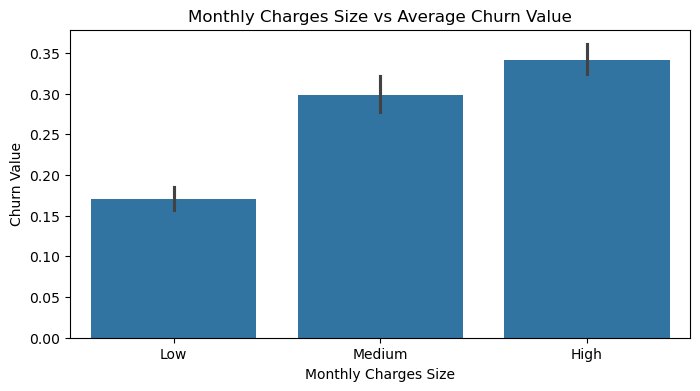

In [105]:
# Creating an aggregate monthly charges feature based on its size
# Specifying bin edges based on boxplot of monthly charges and maximizing ratio of churn or non-churn in each bin
quantiles = churn_1["Monthly Charges"].quantile([0.25, 0.50])

# Mapping monthly charges to a group of low, medium or high
churn_df["Monthly Charges Size"] = churn_df['Monthly Charges'].map(lambda x: 'Low' if x <= quantiles.iloc[0] 
                                                                   else "Medium" if x <= quantiles.iloc[1] 
                                                                   else 'High')

# Ensuring that the categories appear in order
churn_df["Monthly Charges Size"] = pd.Categorical(churn_df["Monthly Charges Size"], ["Low", "Medium", "High"])

# Visualizing monthly charges size vs average churn value
plt.figure(figsize=(8, 4))
sns.barplot(data=churn_df, x="Monthly Charges Size", y="Churn Value")

# Formatting the plot
plt.title("Monthly Charges Size vs Average Churn Value")
plt.xlabel("Monthly Charges Size")
plt.ylabel("Churn Value")
plt.show()

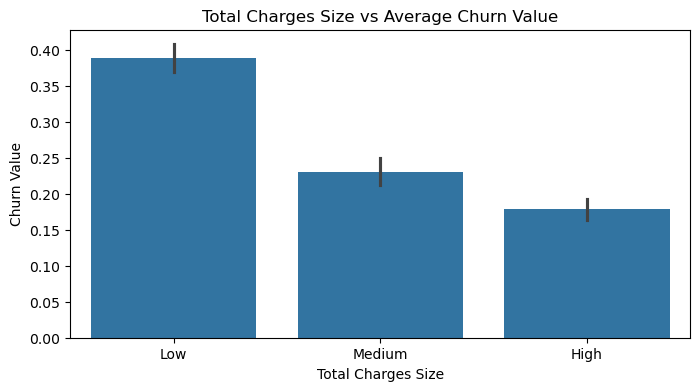

In [106]:
# Creating an aggregate total charges feature based on its size
# Specifying bin edges based on boxplot of total charges and maximizing ratio of churn or non-churn in each bin
quantiles = churn_1["Total Charges"].quantile([0.5, 0.75])

# Mapping total charges to a group of low, medium or high
churn_df["Total Charges Size"] = churn_df['Total Charges'].map(lambda x: 'Low' if x <= quantiles.iloc[0] 
                                                               else "Medium" if x <= quantiles.iloc[1] 
                                                               else 'High')

# Ensuring that the categories appear in order
churn_df["Total Charges Size"] = pd.Categorical(churn_df["Total Charges Size"], ["Low", "Medium", "High"])

# Visualizing total charges size vs average churn value
plt.figure(figsize=(8, 4))
sns.barplot(data=churn_df, x="Total Charges Size", y="Churn Value")

# Formatting the plot
plt.title("Total Charges Size vs Average Churn Value")
plt.xlabel("Total Charges Size")
plt.ylabel("Churn Value")
plt.show()

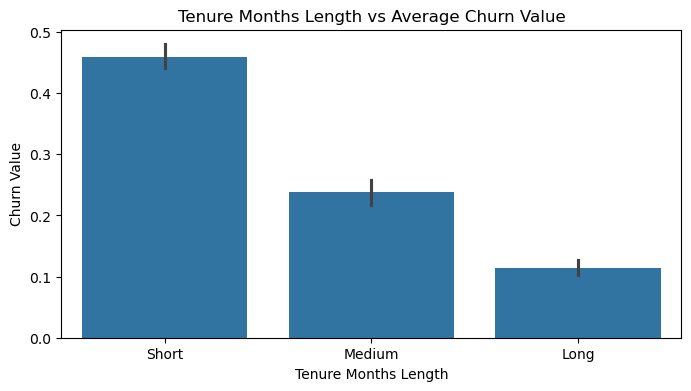

In [107]:
# Creating an aggregate tenure months feature based on its length
# Specifying bin edges based on boxplot of tenure months and maximizing ratio of churn or non-churn in each bin
quantiles = churn_0["Tenure Months"].quantile([0.25, 0.5])

# Mapping tenure months to a group of short, medium or long
churn_df["Tenure Months Length"] = churn_df['Tenure Months'].map(lambda x: 'Short' if x <= quantiles.iloc[0] 
                                                                 else "Medium" if x <= quantiles.iloc[1]
                                                                 else 'Long')

# Ensuring that the categories appear in order
churn_df["Tenure Months Length"] = pd.Categorical(churn_df["Tenure Months Length"], ["Short", "Medium", "Long"])

# Visualizing tenure months length vs average churn value
plt.figure(figsize=(8, 4))
sns.barplot(data=churn_df, x="Tenure Months Length", y="Churn Value")

# Formatting the plot
plt.title("Tenure Months Length vs Average Churn Value")
plt.xlabel("Tenure Months Length")
plt.ylabel("Churn Value")
plt.show()

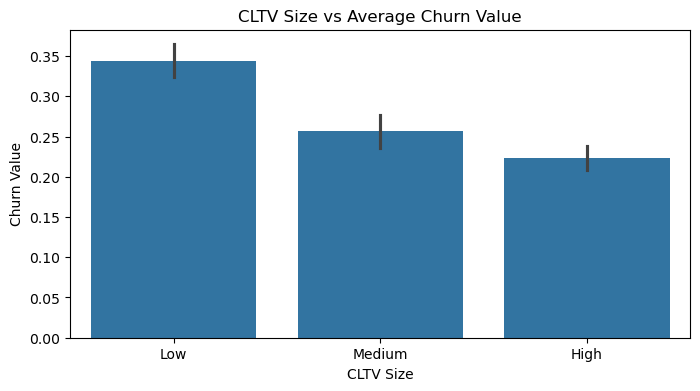

In [108]:
# Creating an aggregate CLTV feature based on its size
# Specifying bin edges based on boxplot of CLTV and maximizing ratio of churn or non-churn in each bin
quantiles = churn_0["CLTV"].quantile([0.25, 0.5])

# Mapping CLTV to a group of low, medium or high
churn_df["CLTV Size"] = churn_df['CLTV'].map(lambda x: 'Low' if x <= quantiles.iloc[0]
                                             else "Medium" if x <= quantiles.iloc[1]
                                             else 'High')

# Ensuring that the categories appear in order
churn_df["CLTV Size"] = pd.Categorical(churn_df["CLTV Size"], ["Low", "Medium", "High"])

# Visualizing the CLTV size vs average churn value
plt.figure(figsize=(8, 4))
sns.barplot(data=churn_df, x="CLTV Size", y="Churn Value")

# Formatting the plot
plt.title("CLTV Size vs Average Churn Value")
plt.xlabel("CLTV Size")
plt.ylabel("Churn Value")
plt.show()

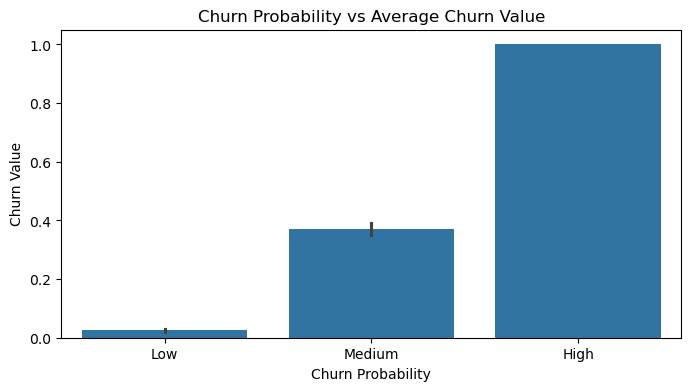

In [109]:
# Creating an aggregate churn score feature based on its size
# Specifying bin edges based on boxplot of churn score, maximizing ratio of churn or non-churn in each bin
quantiles = churn_0["Churn Score"].quantile([0.75, 1])

# Mapping CLTV to a group of low, medium or high
churn_df["Churn Probability"] = churn_df['Churn Score'].map(lambda x: 'Low' if x <= quantiles.iloc[0]
                                             else "Medium" if x <= quantiles.iloc[1]
                                             else 'High')

# Ensuring that the categories appear in order
churn_df["Churn Probability"] = pd.Categorical(churn_df["Churn Probability"], ["Low", "Medium", "High"])

# Visualizing churn probability vs average churn value
plt.figure(figsize=(8, 4))
sns.barplot(data=churn_df, x="Churn Probability", y="Churn Value")

# Formatting the plot
plt.title("Churn Probability vs Average Churn Value")
plt.xlabel("Churn Probability")
plt.ylabel("Churn Value")
plt.show()

In [110]:
# Checking cardinality of features
churn_df.nunique()

CustomerID              7043
Count                      1
Country                    1
State                      1
City                    1129
Zip Code                1652
Lat Long                1652
Latitude                1652
Longitude               1651
Gender                     2
Senior Citizen             2
Partner                    2
Dependents                 2
Tenure Months             73
Phone Service              2
Multiple Lines             3
Internet Service           3
Online Security            3
Online Backup              3
Device Protection          3
Tech Support               3
Streaming TV               3
Streaming Movies           3
Contract                   3
Paperless Billing          2
Payment Method             4
Monthly Charges         1585
Total Charges           6531
Churn Label                2
Churn Value                2
Churn Score               85
CLTV                    3438
Churn Reason              20
Monthly Charges Size       3
Total Charges 

In [111]:
# Dropping high cardinality and constant features
churn_df_clean = churn_df.copy()
churn_df_clean.drop(columns=["CustomerID", "Count", "Country", "State", "City", "Zip Code", "Lat Long", 
                              "Latitude", "Longitude", "Monthly Charges", "Total Charges", "CLTV"], axis=1, inplace=True)

# Dropping redundant features
churn_df_clean.drop(columns=["Tenure Months", "Churn Score", "Churn Label"], axis=1, inplace=True)

# Dropping natural language feature
churn_df_clean.drop(columns=["Churn Reason"], axis=1, inplace=True)

# Dropping churn probability to prevent data leakage
churn_df_clean.drop(columns=["Churn Probability"], axis=1, inplace=True)

# Showing final selection of attributes
churn_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Gender                7043 non-null   object  
 1   Senior Citizen        7043 non-null   object  
 2   Partner               7043 non-null   object  
 3   Dependents            7043 non-null   object  
 4   Phone Service         7043 non-null   object  
 5   Multiple Lines        7043 non-null   object  
 6   Internet Service      7043 non-null   object  
 7   Online Security       7043 non-null   object  
 8   Online Backup         7043 non-null   object  
 9   Device Protection     7043 non-null   object  
 10  Tech Support          7043 non-null   object  
 11  Streaming TV          7043 non-null   object  
 12  Streaming Movies      7043 non-null   object  
 13  Contract              7043 non-null   object  
 14  Paperless Billing     7043 non-null   object  
 15  Paym

## Data Preprocessing Overview
**Process**
- Checked for duplicates. 
- Checked for null values. 
- Checked the cardinality of features. 
- Checked for typos and inconsistent case in low cardinality categorical features. 
- Removed any leading and trailing spaces of object data types. 
- Specified filtered datasets based on churn value. 
- Created and visualized barplots of aggregated features based on boxplot values of features. 
- Checked cardinality of features. 
- Dropped high cardinality, constant, redundant and natural language features.
- Dropped churn probability.

**Findings**
- There are no duplicates.
- The only null values are for the churn reason feature.
- No typos or inconsistent case instances were found.
- High churn scores led to churn 100% of the time and are dropped to prevent data leakage.  

# Model Training and Evaluation
We train and evaluate classification machine learning models to predict whether a customer will churn.

In [114]:
# Installing packages
!pip install xgboost -q

In [115]:
# Model selection
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold

# Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# Metrics
from sklearn.metrics import accuracy_score, classification_report

# Preprocessing and transformers
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

# Pipeline
from sklearn.pipeline import Pipeline

# Splitting the data into training and testing data
X = churn_df_clean.drop("Churn Value", axis=1)
y = churn_df_clean["Churn Value"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Numerical features
num_features = X.select_dtypes(include="number").columns

# Ordinal categorical features
ord_mapping = {
    "Monthly Charges Size": ["Low", "Medium", "High"], 
    "Total Charges Size": ["Low", "Medium", "High"], 
    "Tenure Months Length": ["Short", "Medium", "Long"], 
    "CLTV Size": ["Low", "Medium", "High"]
}

ordinal_encoder = OrdinalEncoder(
    categories=[
        ord_mapping["Monthly Charges Size"], 
        ord_mapping["Total Charges Size"], 
        ord_mapping["Tenure Months Length"], 
        ord_mapping["CLTV Size"]
    ]
)

ord_features = ["Monthly Charges Size", "Total Charges Size", "Tenure Months Length", "CLTV Size"]

# Nominal categorical features
nom_features = X.select_dtypes(include="object").columns

In [116]:
# Transforming categorical features to numerical features for universal machine learning model compatibility
preprocessor = ColumnTransformer(
    transformers=[
        ("num", "passthrough", num_features),
        ("ord", ordinal_encoder, ord_features),
        ("cat", OneHotEncoder(sparse_output=False, handle_unknown="ignore"), nom_features)
    ]
)

In [117]:
# Defining pipelines for classification machine learning model training and evaluation
models = {
    "Logistic Regression": Pipeline([
        ("preprocessor", preprocessor),
        ("classifier", LogisticRegression(random_state=42))
    ]), 
    "Decision Tree": Pipeline([
        ("preprocessor", preprocessor), 
        ("classifier", DecisionTreeClassifier(random_state=42))
    ]), 
    "Random Forest": Pipeline([
        ("preprocessor", preprocessor), 
        ("classifier", RandomForestClassifier(random_state=42))
    ]), 
    "Gradient Boosting": Pipeline([
        ("preprocessor", preprocessor),
        ("classifier", GradientBoostingClassifier(random_state=42))
    ]), 
    "SVM": Pipeline([
        ("preprocessor", preprocessor),
        ("classifier", SVC(random_state=42))
    ]),
    "XGBoost": Pipeline([
        ("preprocessor", preprocessor),
        ("classifier", XGBClassifier(random_state=42))
    ]),
}

In [118]:
# Defining hyperparameter grids for classification machine learning models
param_grids = {   
    "Logistic Regression": {
        "classifier__C": [0.1, 1, 10, 100], 
        "classifier__solver": ["liblinear", "saga"], 
        "classifier__class_weight": ["balanced", None],
        "classifier__max_iter": [100, 200]
        },
    "Decision Tree": {
        "classifier__max_depth": [3, 5, 7, 10, 15, 20], 
        "classifier__min_samples_split": [2, 5, 10], 
        "classifier__min_samples_leaf": [1, 2, 4],
        "classifier__class_weight": ["balanced", None]
        },
    "Random Forest": {
        "classifier__n_estimators": [100, 200, 300], 
        "classifier__max_depth": [10, 20, 30], 
        "classifier__class_weight": ["balanced", None],
        "classifier__min_samples_split": [2, 5], 
        "classifier__min_samples_leaf": [1, 2]
        },
    "Gradient Boosting": {
        "classifier__n_estimators": [100, 200, 300], 
        "classifier__learning_rate": [0.01, 0.1, 0.2], 
        "classifier__subsample": [0.8, 1.0], 
        "classifier__max_depth": [3, 5, 7],
        "classifier__min_samples_split": [2, 5]
        },
    "SVM": {
        "classifier__C": [0.1, 1, 10], 
        "classifier__kernel": ["linear", "rbf"], 
        "classifier__class_weight": ["balanced", None],
        "classifier__gamma": ["scale", "auto"]
        },
    "XGBoost": {
        "classifier__n_estimators": [100, 200, 300], 
        "classifier__learning_rate": [0.01, 0.1, 0.2],
        "classifier__subsample": [0.8, 1.0], 
        "classifier__max_depth": [3, 5, 7], 
        "classifier__colsample_bytree": [0.8, 1.0], 
        "classifier__min_child_weight": [1, 3]
        }
}

In [119]:
# Using GridSearchCV to find the best model
best_models = {}

for model_name, model_pipeline in models.items():
    print(f"Training {model_name}...")

    # Getting the hyperparameter grid for the current model
    param_grid = param_grids[model_name]

    # Performing grid search
    grid_search = GridSearchCV(model_pipeline, param_grid, cv=StratifiedKFold(n_splits=5), 
                               n_jobs=-1, verbose=1, scoring="f1")

    # Fitting the best model
    grid_search.fit(X_train, y_train)

    # Storing the best model
    best_models[model_name] = grid_search.best_estimator_

    # Predicting the churn values for the test set
    y_pred = grid_search.predict(X_test)

    # Getting the parameters for the best model
    print(f"Best parameters for {model_name}: {grid_search.best_params_}\n")
    print(f"Classification report for {model_name}:\n{classification_report(y_test, y_pred)}\n")

# Setting initial model variables
best_y_pred = None
best_recall = 0
best_f1_score = 0
best_accuracy = 0
best_model_name = ""
best_model = None
preprocessor = None

# Getting the best model
for model_name, model in best_models.items():
    # Getting the model's evaluation metrics
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    recall = report["1"]["recall"]
    f1_score = report["1"]["f1-score"]
    accuracy = accuracy_score(y_test, y_pred)

    # Printing the model's evaluation metrics
    print(f"{model_name}: Recall: {recall:.4f}, f1_score {f1_score:.4f} and accuracy: {accuracy:.4f}")
    
    # Updating the best model if conditions are met
    if f1_score > best_f1_score and accuracy > 0.7:
        best_y_pred = y_pred
        best_recall = recall
        best_f1_score = f1_score
        best_accuracy = accuracy
        best_model_name = model_name
        best_model = model.named_steps["classifier"]
        preprocessor = model.named_steps["preprocessor"]

# Displaying the best model
print(f"The best model is: {best_model_name} with recall: {best_recall:.4f}, f1_score: {best_f1_score:.4f} and accuracy: {best_accuracy:.4f}")

Training Logistic Regression...
Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best parameters for Logistic Regression: {'classifier__C': 0.1, 'classifier__class_weight': 'balanced', 'classifier__max_iter': 100, 'classifier__solver': 'liblinear'}

Classification report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.90      0.74      0.82      1035
           1       0.52      0.78      0.62       374

    accuracy                           0.75      1409
   macro avg       0.71      0.76      0.72      1409
weighted avg       0.80      0.75      0.77      1409


Training Decision Tree...
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters for Decision Tree: {'classifier__class_weight': 'balanced', 'classifier__max_depth': 7, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2}

Classification report for Decision Tree:
              precision    recall  f1-score   support

 

## Model Training and Evaluation Overview
**Process**
- Imported all packages needed for machine learning with classification models. 
- Split the data into training and testing data.
- Separated features into numerical, ordinal categorical and nominal categorical features. 
- Applied ordinal and one-hot encoding to categorical features. 
- Defined the models to train. 
- Defined the hyperparameter grid for each model. 
- Performed GridSearchCV to find the best hyperparameters and combined it with StratifiedKFold to maintain distribution of negative and positive churn values for each fold. 
- Calculated best parameters and classification report for each model. 
- Calculated evaluation metrics for each model and determined the best one based on f1-score and accuracy.

**Findings**
- We determine that the best model is Logistic Regression with recall 0.7754, f1-score 0.6250 and accuracy 0.7530.  

# Model Interpretation
We explain how the logistic regression model makes predictions. 

In [122]:
# Installing packages
!pip install shap -q

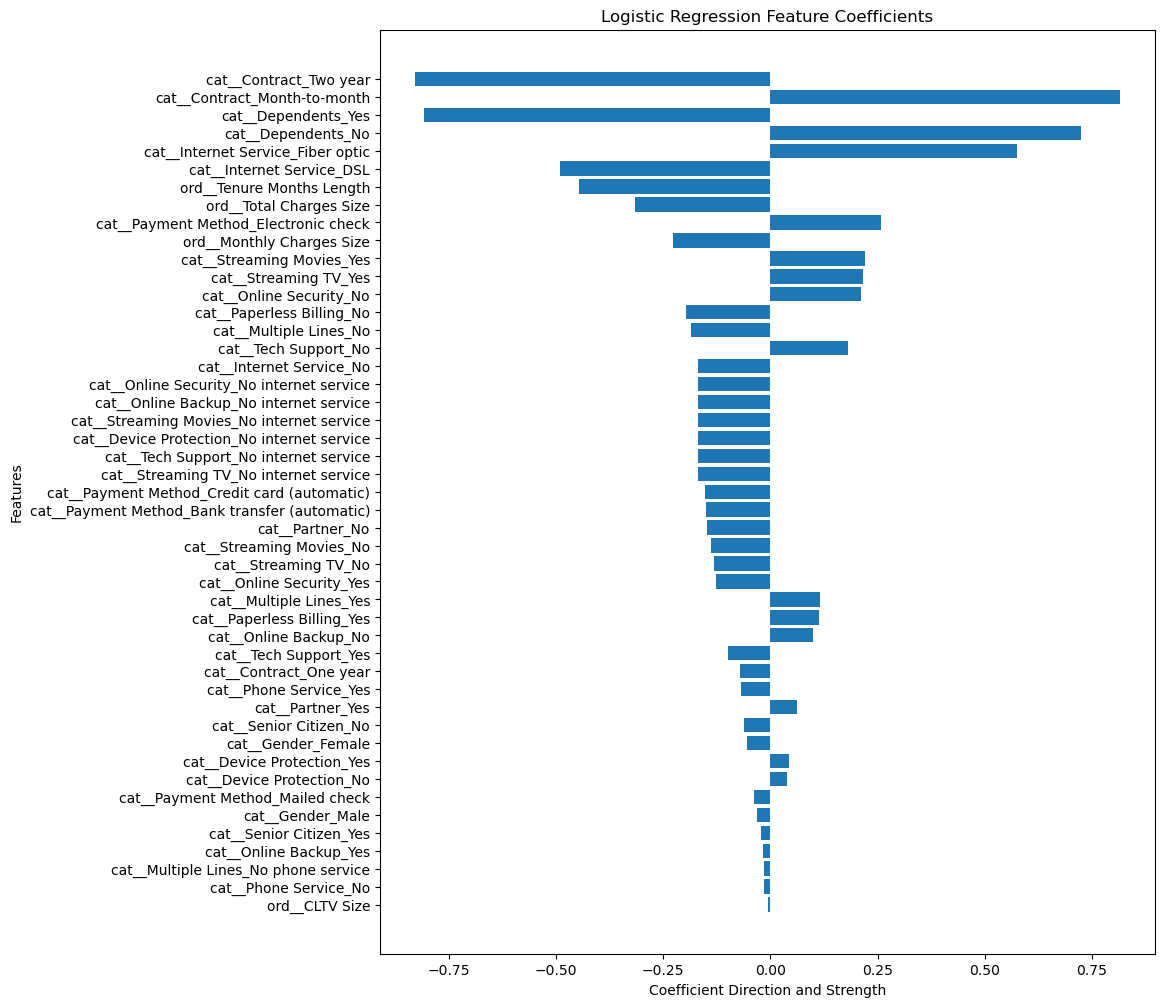

In [123]:
# Generating logistic regression feature coefficients
import numpy as np

# Getting feature names and coefficients
feature_names = preprocessor.get_feature_names_out()
coefficients = best_model.coef_[0]

# Sorting feature names by absolute coefficient value
sorted_indices = np.argsort(np.abs(coefficients))
sorted_features = feature_names[sorted_indices]
sorted_coefficients = coefficients[sorted_indices]

# Plotting the coefficients
plt.figure(figsize=(10, 12))
plt.barh(sorted_features, sorted_coefficients)
plt.title("Logistic Regression Feature Coefficients")
plt.xlabel("Coefficient Direction and Strength")
plt.ylabel("Features")
plt.show()

## Feature Importances
**Process**
- Got the feature names from the preprocessor.
- Got the coefficients from the Logistic Regression model.
- Sorted feature names by feature importance.
- Visualized feature coefficients in a barplot.

**Findings**
- The month-to-month contract, having no dependents and having fiber optic internet service increase the likelihood of churning the most.
- The two-year contract, having dependents and a DSL internet service, reduce the likelihood of churning the most.
- The customer's lifetime value has the least influence over predicting whether the customer will churn. 

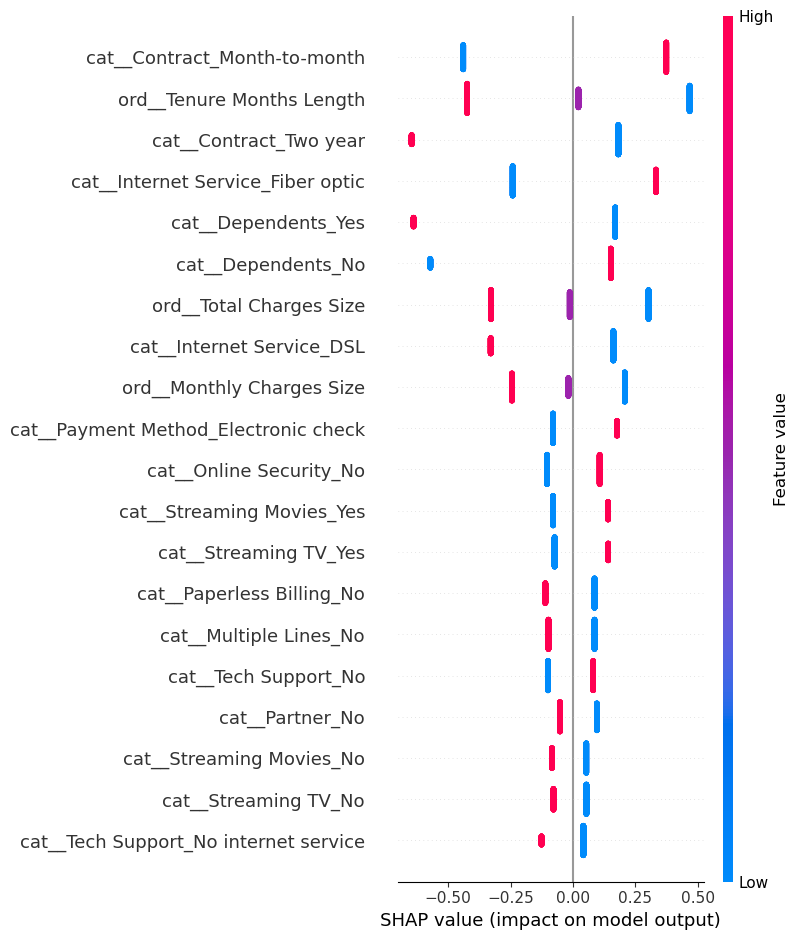

In [125]:
# Creating the SHAP summary plot for global impact of features on churn
import shap

# Getting feature names from preprocessor
feature_names = preprocessor.get_feature_names_out()

# Preprocessing X_test
X_test_transformed = preprocessor.transform(X_test)
X_test_df = pd.DataFrame(X_test_transformed, columns=feature_names)

# Generating SHAP values
explainer = shap.LinearExplainer(best_model, X_test_df)
shap_values = explainer(X_test_df)

# Creating the SHAP summary plot
shap.summary_plot(shap_values, X_test_df)

## SHAP Summary Plot
**Process**
- Got the feature names from the preprocessor.
- Preprocessed X_test and converted it to a dataframe.
- Generated SHAP values and created the SHAP summary plot.

**Findings**
- Features that increases the likelihood of churn the most are low tenure length, month-to-month contract and having fiber optic internet service. 
- Features that decrease the likelihood of churn the most are two year contract, having dependents and having a high tenure months length.
- The feature that seems to have the lowest influence in predicting churn is the tech support with no internet service feature. 

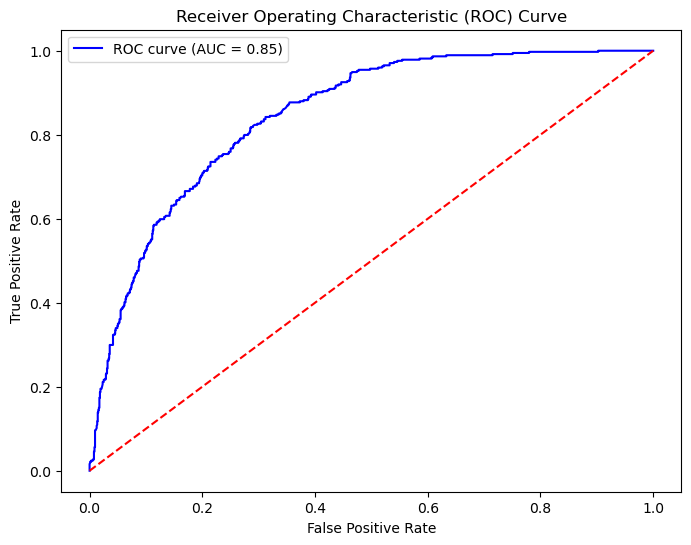

In [127]:
from sklearn.metrics import roc_curve, auc

# Getting the predicted probabilities for the positive class (churn=1)
y_pred_prob = best_model.predict_proba(X_test_transformed)[:, 1]

# Calculating the ROC curve false positive rate and true positive rate for all decision thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculating the ROC curve's area under the curve (AUC)
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="b", label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="r", linestyle="--")  # Baseline for random guessing
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="best")
plt.show()

## ROC curve (Receiver Operating Characteristic curve)
**Process**
- Got the predicted probabilities for churning from the Logistic Regression model.
- Calculated the false and true positive rates for all decision thresholds.
- Calculated the AUC of the ROC curve (area under curve).
- Plotted the ROC curve. 

**Findings**
- We see that the AUC is 0.85, which indicates that the model is quite good at separating churners from non-churners.
- The smooth ROC curve indicates that the model behaves consistently across all thresholds and generalizes well.  

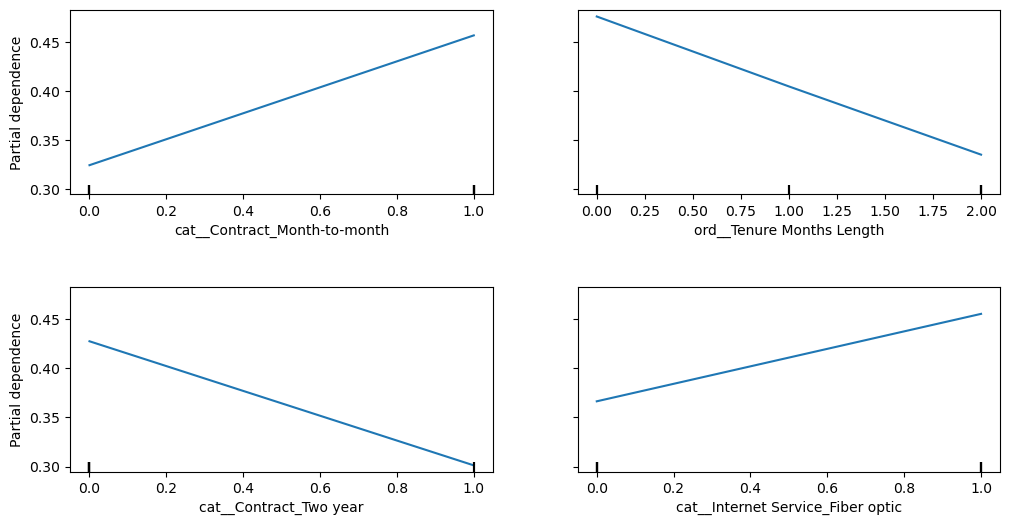

In [129]:
# Gathering the top SHAP features
from sklearn.inspection import PartialDependenceDisplay

# Function for getting the indices of the features with the highest absolute mean shap values
def get_top_shap_feature_indices(shap_values, top_n=4):
    mean_abs_shap = np.abs(shap_values.values).mean(axis=0)
    top_indices = np.argsort(mean_abs_shap, axis=0)[-top_n:][::-1] # Get top indices in descending order
    return top_indices.tolist()

# Getting the top 4 feature indices of the SHAP summary plot
top_feature_indices = get_top_shap_feature_indices(shap_values, top_n=4)

# Creating partial dependence plots
fig, ax = plt.subplots(figsize=(12, 6))
PartialDependenceDisplay.from_estimator(
    best_model, 
    X_test_transformed, 
    features=top_feature_indices, 
    feature_names = feature_names, 
    n_cols=2, 
    ax=ax
)

# Increasing the vertical spacing between plots
plt.subplots_adjust(hspace=0.5)
plt.show()

## Partial Dependence Plots
**Process**
- Made a function for getting the indices of the top n features in the SHAP summary plot.
- Got the top 4 feature indices of the SHAP summary plot.
- Created partial dependence plots for the top 4 features.
- Increased the vertical spacing between each plot. 

**Findings**
- We see that having a month-to-month contract increases churn probability by about 10%, whereas having fiber optic internet increases it by slightly less than 10%.
- Conversely a long tenure length or having dependents, each reduce the likelihood of churning by more than 10%.

# Model Deployment
We deploy the model as part of a streamlit app, hosted in the streamlit community cloud. The streamlit app features an interactive analysis dashboard of the data in the dataset and the predictions made on it. We also create a Power BI dashboard analysis picture gallery that shows how the data changes based on filtering.

In [132]:
# Saving data for Power BI dashboard and streamlit app 
import joblib

# Saving X_test_df with predictions and true values for Power BI
predictions_df = X_test.copy() 
predictions_df["y_true"] = y_test.values
predictions_df["y_pred"] = best_y_pred

predictions_df.to_parquet("data/predictions.parquet", index=False)

# Saving churn_df, X_test_df and best_model for streamlit
joblib.dump(churn_df, "data/churn_df.pkl")
joblib.dump(X_test_df, "data/X_test_df.pkl")
joblib.dump(best_model, "model/best_model.pkl")

['model/best_model.pkl']

## Model Deployment Overview
**Process**
- Saved data for Power BI and streamlit.
- Created streamlit app through the following process:
    - Imported all packages that we need for the app. 
    - Loaded data.
    - Created sidebar filters.
    - Created filtered dataframe.
    - Showed filtered dataframe, filtered churn values distribution and filtered tenure months distribution.
    - Created a SHAP feature importances plot for a selected prediction with predicted churn probability and label. 
- Created a Power BI dashboard of visualizations and key metrics.
- Created a picture gallery of Power BI dashboard analyses.
- Created a GitHub repository with the project files.
- Connected the streamlit app to the streamlit community cloud.  

**Findings**
- The overall churn rate is 27%.
- Women churn 3 percent point more than men at 28%.
- Customers with fiber optic internet have a churn rate at 41%, compared to customers with no internet with a churn rate of only 8%.
- A month-to-month contract has a churn rate at 43%, compared to a two year contract at just 5%.
- If the customer has neither a partner or dependents, their churn rate is 35%, but with both a partner and dependents, it drops to 5%.
- Customers using paperless billing churn at a rate of 33%, while those not using paperless, only churn at a rate of 18%.
- Customers with short tenure month churn at a rate of 48%, while those with long tenures churn at a rate of just 9%.
- Customers with low customer life time value churn at a rate of 36%, while those with high life time value churn at a rate of 22%.
- Streamlit app initial loading and visualizations have been tested to load within seconds. 

# Conclusion
**Problem**

Determining customers at risk of churning and the primary reasons for why they churn and building a classification model that can determine the likelihood of a customer churning. 

**Process**

We acquired customer data spanning 6 years with an indication for whether or not the customer has churned at the end of this period. We explored the data attributes and relationships between features and churning using seaborn visualizations, cleaned up the data and performed feature engineering, making new aggregated features of high cardinality features. We trained an array of classification machine learning models on our cleaned dataset and evaluated them based on f1-score and accuracy. We then interpreted the best model by plotting feature coefficients, a shap summary plot, a ROC curve and partial dependence plot. We then proceeded to deploy the model to a streamlit app, showcasing key visualizations with a filtering mechanism along with a SHAP feature importances plot for the selected prediction, with predicted churn probability and label.  

**Findings**
- Some features have only a single value, making them redundant for analysis and pattern recognition. These features were subsequently dropped from the dataset. 
- 26.5% of customers have churned as of the end of the 6 year period. 
- Seniors churn more than non-seniors at 40%, compared to 25%. 
- Having a partner and dependents significantly reduce churn from 5% with both to 35% with neither. 
- Higher internet speed increases churn. 
- Having device protection reduces the likelihood of churn. 
- Having both online security and online backup reduces churn to a rate of 10%, compared to 50% with neither. 
- Longer contracts lead to lower churn. 
- The electronic check payment method has the highest likelihood of churn by far. 
- The attitude of the support person, competitor offering higher download speed and competitor offering more data are the most common reasons for churning.
- If the churn score is higher than 80, the likelihood of the customer churning is 100%. We therefore drop this feature to prevent data leakage, where we know the right answer in advance. 
- The best model is found to be Logistic Regression with a recall of 0.7754, an f1-score of 0.6250 and an accuracy of 0.7530. 
- The customers lifetime value has little to no influence over predicting whether the customer will churn. 
- The model has an AUC of 0.85, indicating that it is quite good at separating churners from non-churners, with a smooth ROC curve, conveying that it behaves consistently across all thresholds and generalizes well. 

**Recommendations**

Focus marketing and retention efforts on seniors, single people and customers with no device protection, online security or online backup. Develop a guideline for supporting customers and educate support personel in this guideline to increase customer satisfaction. Create subscription tiers to accommodate the differing internet and data needs of customers. Use the classification model on a monthly basis to determine customers with a high likelihood of churning, and determine how we can reduce their likelihood of churning on an individual basis.   

**Improvements**

This project is based on the use of a selection of 6 machine learning models, but it is possible that using another machine learning model could provide greater accuracy in determining churn. Furthermore, we could employ the use of l1 and l2 regularization, which may increase the accuracy of the model, but this will also lead to longer training times, so it is a trade-off. We also see that the numerical correlation between tenure months and CLTV is 0.4. Although this is not a tremendous amount, the model interpretation of feature coefficients reveals that the CLTV size feature has little influence over predicting churn with a coefficient close to 0, so it is possible that including the CLTV size feature introduces more noise than signal, and removing it could potentially make the model more accurate. 